In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('insurance.csv')

print(data.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [220]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [221]:
drop_data=data.drop(columns=['sex','smoker'])

res=drop_data.groupby('region').mean()
print(res)

                 age        bmi  children      expenses
region                                                 
northeast  39.268519  29.176235  1.046296  13406.384691
northwest  39.196923  29.201846  1.147692  12417.575169
southeast  38.939560  33.359341  1.049451  14735.411538
southwest  39.455385  30.596615  1.141538  12346.937908


In [222]:
data['sex']=data['sex'].apply(lambda x:0 if x=='female' else 1)

print(data)

      age  sex   bmi  children smoker     region  expenses
0      19    0  27.9         0    yes  southwest  16884.92
1      18    1  33.8         1     no  southeast   1725.55
2      28    1  33.0         3     no  southeast   4449.46
3      33    1  22.7         0     no  northwest  21984.47
4      32    1  28.9         0     no  northwest   3866.86
...   ...  ...   ...       ...    ...        ...       ...
1333   50    1  31.0         3     no  northwest  10600.55
1334   18    0  31.9         0     no  northeast   2205.98
1335   18    0  36.9         0     no  southeast   1629.83
1336   21    0  25.8         0     no  southwest   2007.95
1337   61    0  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [223]:
data['smoker']=data['smoker'].apply(lambda x:0 if x=='yes' else 1)

print(data)

      age  sex   bmi  children  smoker     region  expenses
0      19    0  27.9         0       0  southwest  16884.92
1      18    1  33.8         1       1  southeast   1725.55
2      28    1  33.0         3       1  southeast   4449.46
3      33    1  22.7         0       1  northwest  21984.47
4      32    1  28.9         0       1  northwest   3866.86
...   ...  ...   ...       ...     ...        ...       ...
1333   50    1  31.0         3       1  northwest  10600.55
1334   18    0  31.9         0       1  northeast   2205.98
1335   18    0  36.9         0       1  southeast   1629.83
1336   21    0  25.8         0       1  southwest   2007.95
1337   61    0  29.1         0       0  northwest  29141.36

[1338 rows x 7 columns]


In [224]:
region_dummies=pd.get_dummies(data['region'],dtype=int)
data=pd.concat([data,region_dummies],axis=1)
data=data.drop(['region'],axis=1)
data

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,0,16884.92,0,0,0,1
1,18,1,33.8,1,1,1725.55,0,0,1,0
2,28,1,33.0,3,1,4449.46,0,0,1,0
3,33,1,22.7,0,1,21984.47,0,1,0,0
4,32,1,28.9,0,1,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,1,10600.55,0,1,0,0
1334,18,0,31.9,0,1,2205.98,1,0,0,0
1335,18,0,36.9,0,1,1629.83,0,0,1,0
1336,21,0,25.8,0,1,2007.95,0,0,0,1


In [225]:
data[['age','bmi','expenses']].std()

age            14.049960
bmi             6.098382
expenses    12110.011240
dtype: float64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

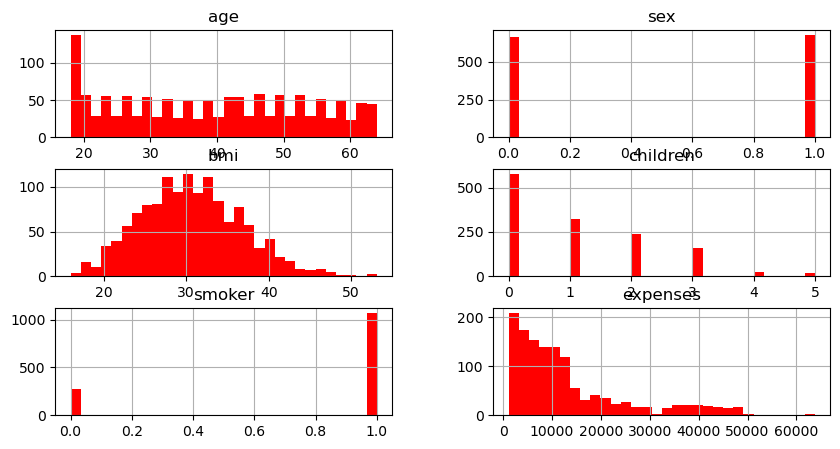

In [226]:
data[['age','sex','bmi','children','smoker','expenses']].hist(bins=30,figsize=(10,5),color='r')

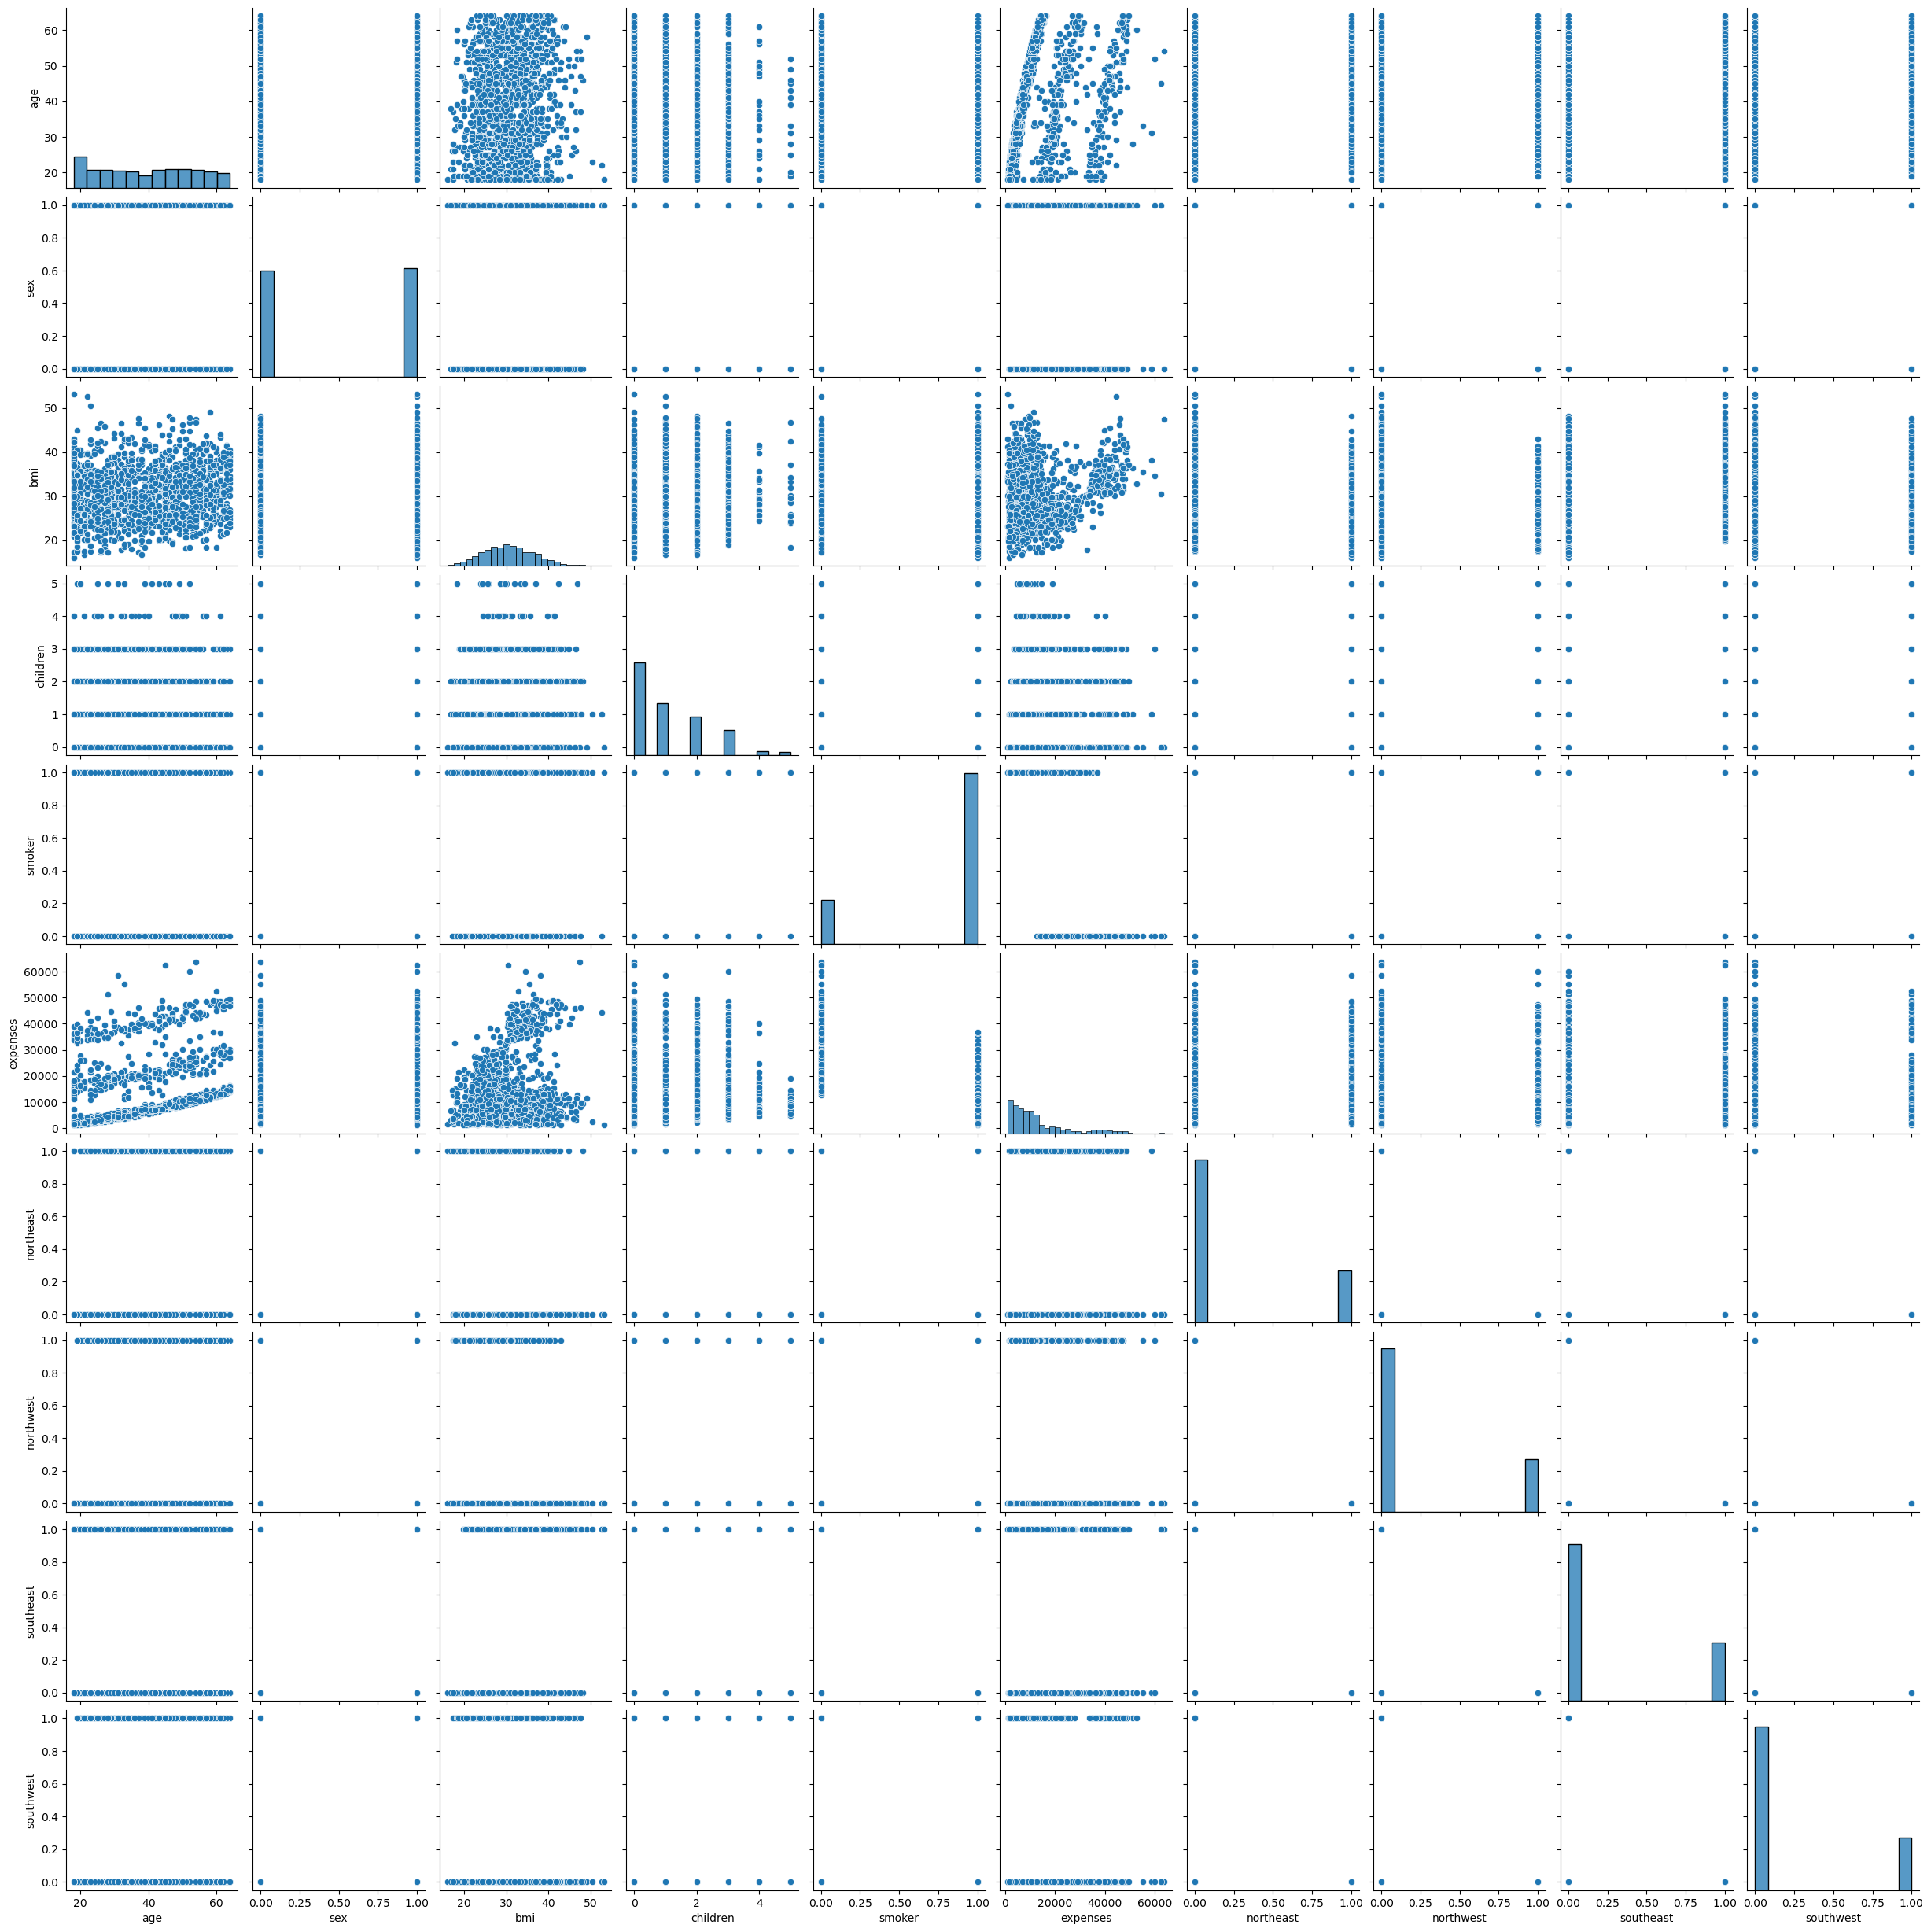

In [227]:
sns.pairplot(data)

<Axes: >

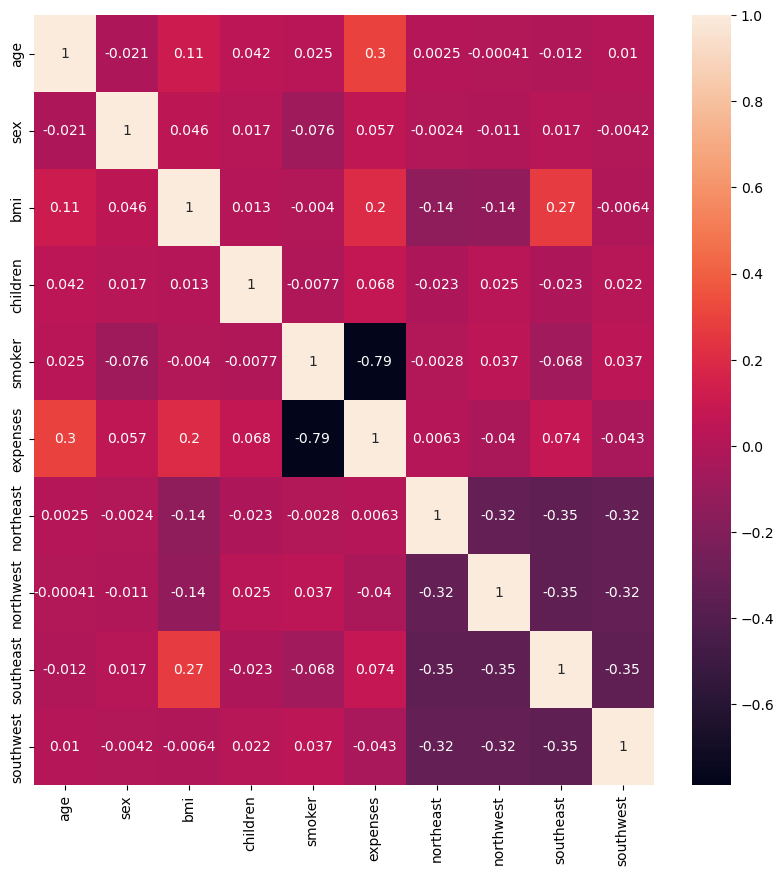

In [228]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [229]:
X=data.drop(columns=['expenses'])
Y=data[['expenses']]


In [230]:
X=np.array(X).astype('float32')
Y=np.array(Y).astype('float32')

print(X)
print(Y)

[[19.   0.  27.9 ...  0.   0.   1. ]
 [18.   1.  33.8 ...  0.   1.   0. ]
 [28.   1.  33.  ...  0.   1.   0. ]
 ...
 [18.   0.  36.9 ...  0.   1.   0. ]
 [21.   0.  25.8 ...  0.   0.   1. ]
 [61.   0.  29.1 ...  1.   0.   0. ]]
[[16884.92]
 [ 1725.55]
 [ 4449.46]
 ...
 [ 1629.83]
 [ 2007.95]
 [29141.36]]


In [231]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()
X=scaler_x.fit_transform(X)

scaler_y=StandardScaler()
Y=scaler_y.fit_transform(Y)

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(Xtrain,Ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [233]:
print(Xtrain.shape)

(1070, 9)


In [234]:
model.score(Xtest,Ytest)

0.7835726737976074

In [235]:
Ypred=model.predict(Xtest)

In [236]:
Ypred_orig=scaler_y.inverse_transform(Ypred)
Ytest_orig=scaler_y.inverse_transform(Ytest)

In [237]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE=mean_squared_error(Ytest,Ypred)
MAE=mean_absolute_error(Ytest,Ypred)
R2=r2_score(Ytest,Ypred)
print(MSE,MAE,R2)

0.22928506135940552 0.34542709589004517 0.7835726737976074


In [255]:
import io
import numpy as np
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri
import boto3

role=sagemaker.get_execution_role()
container=get_image_uri(boto3.Session().region_name,'linear-learner')
sagemaker_session=sagemaker.Session()

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [285]:
import sagemaker.amazon.common as smac

buf=io.BytesIO()

features=np.array(Xtrain)
labels=Ytrain.reshape(1,-1).ravel()
print(labels.shape)
smac.write_numpy_to_dense_tensor(buf,features,labels)
buf.seek(0)

(1070,)


0

In [ ]:
import os

bucket='sagemaker-linear1'
key='linear'
prefix='train'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(key,prefix)).upload_fileobj(buf)

In [288]:
s3_train_data=f's3://{bucket}/{key}/{prefix}'
print(s3_train_data)

output_path='s3://sagemaker-linear1/linear/output'

s3://sagemaker-linear1/linear/train


In [289]:
linear=sagemaker.estimator.Estimator(container,role,train_instance_type='ml.c4.xlarge',sagemaker_session=sagemaker_session,train_instance_count=1,
                                    output_path=output_path)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [291]:
linear.set_hyperparameters(feature_dim=9,predictor_type='regressor',mini_batch_size=100,epochs=100,loss='absolute_loss')

In [292]:
linear.fit({'train': s3_train_data})

INFO:sagemaker.telemetry.telemetry_logging:SageMaker Python SDK will collect telemetry to help us better understand our user's needs, diagnose issues, and deliver additional features.
To opt out of telemetry, please disable via TelemetryOptOut parameter in SDK defaults config. For more information, refer to https://sagemaker.readthedocs.io/en/stable/overview.html#configuring-and-using-defaults-with-the-sagemaker-python-sdk.
INFO:sagemaker:Creating training-job with name: linear-learner-2025-10-04-17-16-24-342


2025-10-04 17:16:25 Starting - Starting the training job...
2025-10-04 17:16:39 Starting - Preparing the instances for training...
2025-10-04 17:17:00 Downloading - Downloading input data...
2025-10-04 17:17:30 Downloading - Downloading the training image.........
2025-10-04 17:19:21 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[10/04/2025 17:19:32 INFO 140524165891904] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss

In [ ]:
linear_regressor=linear.deploy(instance_type='ml.c4.xlarge',initial_instance_count=1)

In [ ]:
from sagemaker.predictor import csv_serializer, json_deserializer

linear_regressor.content_type='text/csv'
linear_regressor.serilaizer=csv_serilazer
linear_regressor.deserializer=json_deserializer


In [ ]:
result=linear_regressor.predict(Xtest)

In [ ]:
linear_regressor.delete_endpoint()